# CLUSTERING EXERCISE

Deskripsi     : Script berikut ini adalah template untuk mengerjakan Homework Data MBA Topik Clustering. Komentar-komentar yang ada di dalamnya bisa Anda jadikan referensi untuk membuat kode sesuai dengan step-step yang sudah dituliskan di dalamnya. 

Dataset       : Data-Jumlah-Kunjungan-Wisman-Ke-Indonesia-Berdasarkan-Pintu-Masuk-Tahun-2014. 

https://data.jakarta.go.id/dataset/data-jumlah-kunjungan-wisman-ke-indonesia-berdasarkan-pintu-masuk-di-dki-jakarta/resource/29c551a3-2d18-4130-b3f9-fc414c03a710

Referensi     : Buku Fundamental of Machine Learning with Python (by Teguh Wahyono)

Curated by    : B. Ari Kuncoro (IYKRA)

## LATAR BELAKANG

Pemerintah Indonesia ingin mengetahui prioritas pembangunan dan penempatan tenaga kerja di bidang pariwisata. Untuk itu, mereka ingin mengelompokkan gerbang pintu masuk wisatawan mancanegara berdasarkan jumlah wisman yang berkunjung ke Indonesia.


## Bagaimana cara melakukan clustering?

> Langkah pertama yang mesti kita lakukan adalah dengan memanggil library atau pustaka yang dibutuhkan, yaitu matplotlib (plt) gunakan , numpy (np), pandas (pd), dan sklearn (khususnya sklearn.cluster, KMeans). 

## IMPORT LIBRARIES

In [1]:
# Step 1. Memanggil Library yang dibutuhkan 

# Write your code here! 

# Library essential

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
sns.set_style('darkgrid')

# Library untuk Kmeans Clustering

from sklearn.cluster import KMeans

# Library untuk Hierarchical Clustering / Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Library untuk membuat Similarity Matrix 

from scipy.spatial.distance import cdist

# Library untuk DB Index untuk mengukur hasil clustering

from sklearn import datasets 
from sklearn.cluster import KMeans 
from sklearn.metrics import davies_bouldin_score


# Catatan: Sebaiknya juga gunakan command %matplotlib inline
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend

> Langkah kedua adalah memanggil Dataset.

## OVERVIEW

In [2]:
# Step 2. Memanggil dataset : 'dataset/gaji_pengeluaran.csv'

# Write your code here! 
df_data = pd.read_csv('dataset/Data-Jumlah-Kunjungan-Wisman-Ke-Indonesia-Berdasarkan-Pintu-Masuk-Tahun-2014.csv')

In [3]:
# Menampilkan 5 baris pertama dari dataset 

# Write your code here! 
df_data.head()

,pintu_masuk,januari,februari,maret,april,mei,juni,juli,agustus,september,oktober,november,desember
0,Soekarno-Hatta,187123.0,180362.0,194720.0,180787.0,184534.0,208624.0,169135.0,218903.0,174169.0,177274.0,180208.0,190598.0
1,Ngurah Rai,278685.0,269367.0,268418.0,277925.0,285965.0,329654.0,358907.0,336628.0,352017.0,339200.0,293858.0,341111.0
2,Kualanamu Int'.,19029.0,17780.0,18493.0,15956.0,19781.0,19376.0,16579.0,16901.0,17792.0,20946.0,22848.0,29243.0
3,Batam,119054.0,97445.0,122019.0,111929.0,115323.0,140218.0,101966.0,111455.0,113090.0,126169.0,123505.0,171907.0
4,Sam Ratulangi,1694.0,1079.0,1340.0,1079.0,1365.0,1487.0,1652.0,1854.0,1652.0,1642.0,943.0,1492.0


## PREPROCESSING

> Selanjutnya drop columns **'pintu_masuk'** sesuai instruksi.

In [4]:
df = df_data.copy()
df = df.drop(columns = 'pintu_masuk')

In [5]:
df.head()

,januari,februari,maret,april,mei,juni,juli,agustus,september,oktober,november,desember
0,187123.0,180362.0,194720.0,180787.0,184534.0,208624.0,169135.0,218903.0,174169.0,177274.0,180208.0,190598.0
1,278685.0,269367.0,268418.0,277925.0,285965.0,329654.0,358907.0,336628.0,352017.0,339200.0,293858.0,341111.0
2,19029.0,17780.0,18493.0,15956.0,19781.0,19376.0,16579.0,16901.0,17792.0,20946.0,22848.0,29243.0
3,119054.0,97445.0,122019.0,111929.0,115323.0,140218.0,101966.0,111455.0,113090.0,126169.0,123505.0,171907.0
4,1694.0,1079.0,1340.0,1079.0,1365.0,1487.0,1652.0,1854.0,1652.0,1642.0,943.0,1492.0


> Rubah dan kelompokkan ke semester 1 dan semester 2 untuk proses clustering.

In [6]:
df_smt1 = df[['januari', 'februari', 'maret', 'april', 'mei', 'juni']]
df_smt2 = df.drop(df_smt1, axis = 1)

In [7]:
df_smt1.head()

,januari,februari,maret,april,mei,juni
0,187123.0,180362.0,194720.0,180787.0,184534.0,208624.0
1,278685.0,269367.0,268418.0,277925.0,285965.0,329654.0
2,19029.0,17780.0,18493.0,15956.0,19781.0,19376.0
3,119054.0,97445.0,122019.0,111929.0,115323.0,140218.0
4,1694.0,1079.0,1340.0,1079.0,1365.0,1487.0


In [8]:
df_smt2.head()

,juli,agustus,september,oktober,november,desember
0,169135.0,218903.0,174169.0,177274.0,180208.0,190598.0
1,358907.0,336628.0,352017.0,339200.0,293858.0,341111.0
2,16579.0,16901.0,17792.0,20946.0,22848.0,29243.0
3,101966.0,111455.0,113090.0,126169.0,123505.0,171907.0
4,1652.0,1854.0,1652.0,1642.0,943.0,1492.0


In [9]:
# Loop untuk mendapat jumlah total pada semester 1

for i in df_smt1:
    df['SUM_SMT_1'] = df_smt1.sum(axis = 1)
    
# Loop untuk mendapat jumlah total pada semester 2

for i in df_smt2:
    df['SUM_SMT_2'] = df_smt2.sum(axis = 1)

> Membuat columns baru yaitu **'SUM_SMT1'** yang merupakan kolom representasi penjumlahan pengunjung wisman pada semester 1, yaitu dari bulan Januari sampai Juni. Dan **'SUM_SMT2'**, representasi dari penjumlahan pengunjung wisman pada semester 2, yaitu dari bulan Juli sampai Desember.

In [10]:
df.head()

,januari,februari,maret,april,mei,juni,juli,agustus,september,oktober,november,desember,SUM_SMT_1,SUM_SMT_2
0,187123.0,180362.0,194720.0,180787.0,184534.0,208624.0,169135.0,218903.0,174169.0,177274.0,180208.0,190598.0,1136150.0,1110287.0
1,278685.0,269367.0,268418.0,277925.0,285965.0,329654.0,358907.0,336628.0,352017.0,339200.0,293858.0,341111.0,1710014.0,2021721.0
2,19029.0,17780.0,18493.0,15956.0,19781.0,19376.0,16579.0,16901.0,17792.0,20946.0,22848.0,29243.0,110415.0,124309.0
3,119054.0,97445.0,122019.0,111929.0,115323.0,140218.0,101966.0,111455.0,113090.0,126169.0,123505.0,171907.0,705988.0,748092.0
4,1694.0,1079.0,1340.0,1079.0,1365.0,1487.0,1652.0,1854.0,1652.0,1642.0,943.0,1492.0,8044.0,9235.0


In [11]:
df_new = pd.concat([df['SUM_SMT_1'], df['SUM_SMT_2']], axis =1)

In [12]:
df_new.head()

,SUM_SMT_1,SUM_SMT_2
0,1136150.0,1110287.0
1,1710014.0,2021721.0
2,110415.0,124309.0
3,705988.0,748092.0
4,8044.0,9235.0


> Langkah ketiga adalah dengan melakukan konversi dataset ke data array. 

In [13]:
# Step 3. Konversi Dataset ke Data Array, assign sebagai X 

# Write your code here!

X = np.asarray(df_new)

In [14]:
X

array([[1136150., 1110287.],
       [1710014., 2021721.],
       [ 110415.,  124309.],
       [ 705988.,  748092.],
       [   8044.,    9235.],
       [ 110251.,  106942.],
       [   9761.,   12703.],
       [   6454.,    6457.],
       [  24981.,   25215.],
       [  34798.,   30143.],
       [  49466.,   48206.],
       [  33937.,   35944.],
       [   7578.,    8135.],
       [   6901.,    6255.],
       [  13302.,   14080.],
       [  46530.,   42626.],
       [  97257.,   83135.],
       [ 158186.,  162675.],
       [  52088.,   48694.],
       [ 229421.,  239005.]])

> Langkah keempat adalah menampilkan Data Array ke dalam Scatter plot.

Text(0.5, 1.0, 'GRAFIK TOTAL PENGUNJUNG WISMAN PER TAHUN')

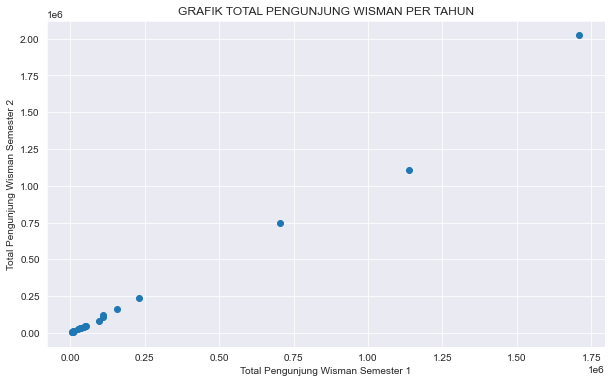

In [15]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 

# Referensi, just uncomment this section: 
plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel('Total Pengunjung Wisman Semester 1')
plt.ylabel('Total Pengunjung Wisman Semester 2')
plt.title('GRAFIK TOTAL PENGUNJUNG WISMAN PER TAHUN')

## MODELLING

### K-MEANS CLUSTERING

> Langkah kelima adalah membuat **Scree plot** dan aktivasi **K-Means**.

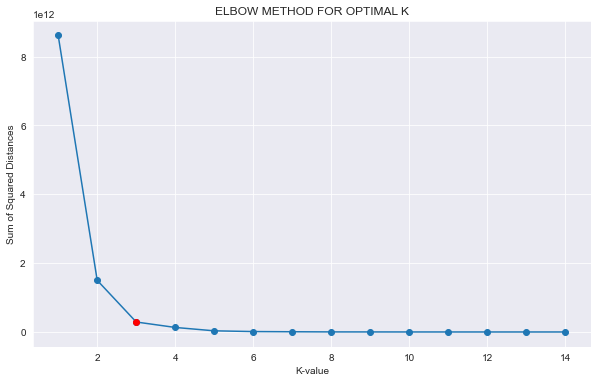

In [16]:
# Step 5a: Membuat Scree Plot 

# Reference: Just uncomment this script 

Sum_of_squared_distances = []
K = range(1,15) # Range of 1 to 15
for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(X)
    Sum_of_squared_distances.append(model.inertia_)
    
plt.figure(figsize = (10,6))
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('K-value')
plt.ylabel('Sum of Squared Distances')
plt.title('ELBOW METHOD FOR OPTIMAL K')
plt.plot(K[2], Sum_of_squared_distances[2], 'ro')
plt.show()

> K-value terbaik menunjukkan pada nilai 3. Artinya data akan di bagi menjadi 3 clusters.

In [17]:
# Step 5b. Melakukan aktivasi algoritma K-Means, 
# pilih berapa jumlah n_cluster berdasarkan elbow method 

# Hint: KMeans, km.fit()
# Write your code here!

kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

> Langkah keenam adalah menampilkan nilai **centroid** dan label data point.

In [18]:
# Step 6. Menampilkan nilai centroid yang dibangkitkan oleh 
# algoritma kmeans. Hint: cluster_centers_ 

# Write your code here! 

print(kmeans.cluster_centers_)

[[  58786.47058824   59044.64705882]
 [ 921069.          929189.5       ]
 [1710014.         2021721.        ]]


In [19]:
# Checking 
# Just uncomment the following code and run

print(kmeans.labels_)

[1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


> Langkah ketujuh adalah visualisasi hasil clustering.

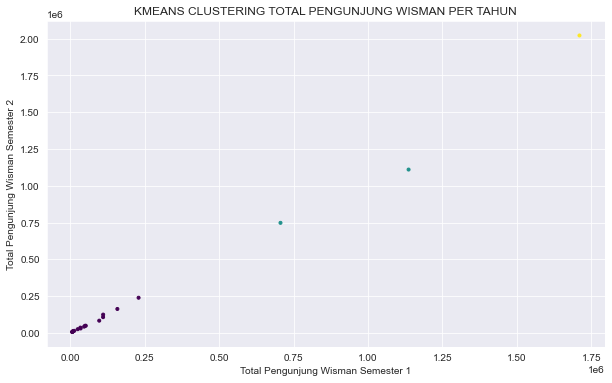

In [20]:
# Step 7 Visualisasi Hasil 

# Uncomment and change the labels in the code and run

plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap = 'viridis', marker='.')
plt.xlabel('Total Pengunjung Wisman Semester 1') # change label!

# Change the title "Grafik Konsumen", label y axis "Pengeluaran" to the appropriate term. 

plt.ylabel('Total Pengunjung Wisman Semester 2') # change label!
plt.title('KMEANS CLUSTERING TOTAL PENGUNJUNG WISMAN PER TAHUN')  # change label!
plt.show()  # change label!

> Dari grafik terlihat 3 clusters, yaitu **cluster 0**, **cluster 1**, dan terakhir **cluster 2**.

> Langkah kedelapan adalah menampilkan hasil centroid di dalam grafik.

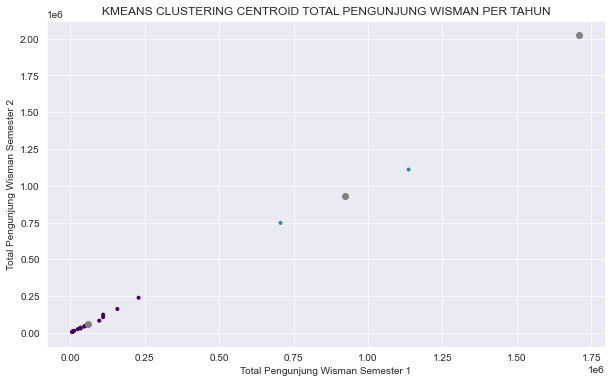

In [21]:
# Step 8 Menampilkan hasil centroid di dalam grafik 

# Uncomment and change the labels for the following code and run

plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='viridis', marker='.')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='gray')
plt.xlabel('Total Pengunjung Wisman Semester 1')
plt.ylabel('Total Pengunjung Wisman Semester 2')
plt.title('KMEANS CLUSTERING CENTROID TOTAL PENGUNJUNG WISMAN PER TAHUN')
plt.show()

> Terlihat centroid pada setiap cluster yang di representasikan dengan warna abu - abu.

In [22]:
# Memasukkan hasil label ke dalam suatu data frame 

kmean_clustered = pd.DataFrame(X)
kmean_clustered['CLUSTER'] = pd.DataFrame(kmeans.labels_)

In [23]:
kmean_clustered = kmean_clustered.astype(int).rename(columns={0: 'SUM_SMT1', 1: 'SUM_SMT2'})

In [24]:
kmean_clustered.head()

,SUM_SMT1,SUM_SMT2,CLUSTER
0,1136150,1110287,1
1,1710014,2021721,2
2,110415,124309,0
3,705988,748092,1
4,8044,9235,0


In [25]:
pd.concat([df_data['pintu_masuk'], kmean_clustered], axis = 1).sort_values(by = 'CLUSTER')

,pintu_masuk,SUM_SMT1,SUM_SMT2,CLUSTER
9,Tanjung Priok,34798,30143,0
17,Tanjung Uban,158186,162675,0
16,Husein Sastranegara,97257,83135,0
15,Adisucipto,46530,42626,0
14,Sultan Syarif Kasim II,13302,14080,0
13,Sepinggan,6901,6255,0
12,Makasar,7578,8135,0
11,Bandara Int. Lombok,33937,35944,0
10,Tanjung Pinang,49466,48206,0
19,Pintu Lainnya,229421,239005,0


In [26]:
print(f"Jumlah Kunjungan Semester 1 sebanyak : {(kmean_clustered['SUM_SMT1']).sum()} kunjungan")
print(f"Jumlah Kunjungan Semester 2 sebanyak : {(kmean_clustered['SUM_SMT2']).sum()} kunjungan")
print(f"Jumlah Selisih Kunjungan tahun 2014  : {(kmean_clustered['SUM_SMT2']).sum()-(kmean_clustered['SUM_SMT1']).sum()} kunjungan")

Jumlah Kunjungan Semester 1 sebanyak : 4551522 kunjungan
Jumlah Kunjungan Semester 2 sebanyak : 4883859 kunjungan
Jumlah Selisih Kunjungan tahun 2014  : 332337 kunjungan


> Menggunakan metode **K-Means Clustering** kita dapat mengetahui bahwa terdapat 3 cluster dari gerbang pintu masuk wisatawan mancanegara berdasarkan jumlah wisman yang berkunjung ke Indonesia. **Cluster 0** merupakan cluster dengan jumlah pintu masuk yang cukup banyak, namun memiliki pengunjung wisman yang relatif lebih sedikit di bandingkan cluster yang lain, karena jika dilihat lebih detail, pintu - pintu yang termasuk dalam cluster ini sebagian besar berada di pelabuhan atau kota yang kemungkinan bukan menjadi alternatif dari tujuan wisman ke Indonesia. **Cluster 1** merupakan pintu masuk *Batam* dan bandar udara *Soekarno-Hatta*, yang jika kita perhatikan walaupun cluster ini berisi 2 pintu ini saja, tetapi cluster ini memiliki pengunjung wisman yang cukup jauh di bandingkan pintu - pintu pada cluster sebelumnya, dengan total sekitar 3,7 juta kunjungan wisman pada data tahun 2014 ini. Sedangkan **Cluster 2** berisi pintu masuk dari bandara *Ngurah Rai* di Bali. Sudah jelas jika pintu ini adalah pintu yang mungkin merupakan **pintu gerbang utama** bagi wisman dalam berkunjung ke Indonesia, mungkin karena memang Bali sudah terkenal di seluruh dunia. Insight lebih lanjut lagi dapat kita lihat bahwa kunjungan wisman memang banyak di lakukan pada semester ke 2, yaitu pada bulan Juli sampai Desember, dengan jumlah selisih lebih dari 300 ribu kunjungan total pada semester 2.

> Artinya dapat di simpulkan sebagian besar wisman yang berkunjung ke Indonesia melewati pintu masuk dari bandara *Ngurah Rai* di Bali. Sehingga jika menjawab pertanyaan pada Latar Belakang masalah di atas, sebaiknya prioritas pembangunan dan penempatan tenaga kerja di bidang pariwisata di fokuskan pada daerah Bali dan sekitarnya. Namun agak sulit untuk di katakan bahwa cluster lainnya tidak di prioritaskan, khususnya pada cluster 0, karena memang sebagian besar kota kunjungan wisman pada cluster 0 ini bukan merupakan daerah pariwisata yang terkenal, atau ada juga pada cluster ini yang merupakan kota kecil yang belum banyak di ketahui yang mungkin dapat menjadi pertimbangan dalam pembangunan untuk meningkatkan nilai jual pariwisata pada daerah sekitar cluster ini.

### HIERARCHICAL / AGGLOMERATIVE CLUSTERING

> Langkah selanjutnya adalah melakukan algoritma **Hierarchical Clustering**.

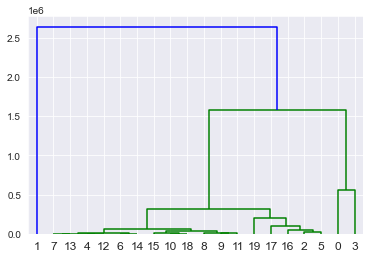

In [27]:
# Membentuk dendogram dengan metode complete 

dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

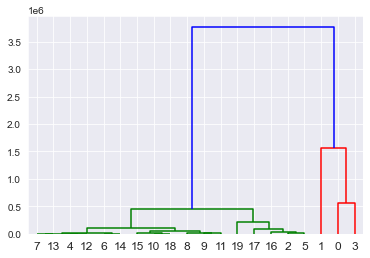

In [28]:
# Membentuk dendogram dengan metode ward 

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [29]:
# Melakukan fitting hierarchical clustering 

agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agglo.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

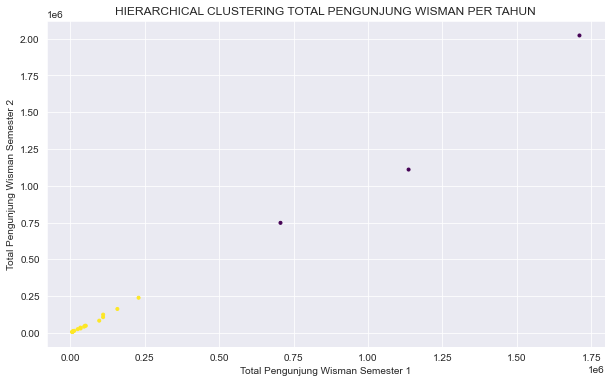

In [30]:
# Plot Data setelah dilakukan hierarchical clustering

plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1], c=agglo.labels_, cmap = 'viridis', marker='.')
plt.xlabel('Total Pengunjung Wisman Semester 1')
plt.ylabel('Total Pengunjung Wisman Semester 2')
plt.title('HIERARCHICAL CLUSTERING TOTAL PENGUNJUNG WISMAN PER TAHUN')
plt.show()
plt.show()

> Berbeda dengan **K-Means Clustering**, **Hierarchical Clustering** mengelompokkan data menjadi 2 cluster saja.

In [31]:
# Memasukkan hasil label ke dalam suatu data frame 

agglo_clustered = pd.DataFrame(X)
agglo_clustered['CLUSTER'] = pd.DataFrame(agglo.labels_)

In [32]:
agglo_clustered = agglo_clustered.astype(int).rename(columns={0: 'SUM_SMT1', 1: 'SUM_SMT2'})

In [33]:
agglo_clustered.head()

,SUM_SMT1,SUM_SMT2,CLUSTER
0,1136150,1110287,0
1,1710014,2021721,0
2,110415,124309,1
3,705988,748092,0
4,8044,9235,1


> Kita dapatkan 2 cluster menggunakan metode ini.

In [34]:
pd.concat([df_data['pintu_masuk'], agglo_clustered], axis = 1).sort_values(by = 'CLUSTER')

,pintu_masuk,SUM_SMT1,SUM_SMT2,CLUSTER
0,Soekarno-Hatta,1136150,1110287,0
1,Ngurah Rai,1710014,2021721,0
3,Batam,705988,748092,0
17,Tanjung Uban,158186,162675,1
16,Husein Sastranegara,97257,83135,1
15,Adisucipto,46530,42626,1
14,Sultan Syarif Kasim II,13302,14080,1
13,Sepinggan,6901,6255,1
12,Makasar,7578,8135,1
11,Bandara Int. Lombok,33937,35944,1


> Melihat hasil yang di lakukan dengan menggunakan metode **Hierarchical Clustering** / **Agglomerative Clustering** ini. Kita dapat menyimpulkan insight yang kurang lebih mirip dengan metode **K-Means Clustering** sebelumnya, hanya bedanya pintu masuk *Ngurah Rai* dijadikan satu cluster dengan *Soekarno-Hatta* dan *Batam*.

## MODEL EVALUATION

In [35]:
# Menghitung Dunn's index 
# Mengingat tidak ada function Dunn's Index dalam sklearn, kita gunakan alternatif lain yaitu DB Index. 
# Silakan baca referensi berikut

Referensi: https://www.geeksforgeeks.org/dunn-index-and-db-index-cluster-validity-indices-set-1/ 

In [36]:
# Namun ketika dicoba, package sklearn mesti dinaikkan versinya menjadi versi 0.21.2
# Alternatif lain, kita bisa melakukan pembuatan function seperti pada referensi berikut ini: 

Referensi: https://gist.github.com/douglasrizzo/cd7e792ff3a2dcaf27f6

> Langkah terakhir mengevaluasi dengan menggunakan Similarity Matrix dan Davies Bouldin Index.

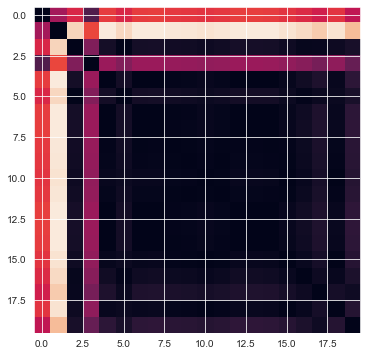

In [37]:
# Membuat similarity Matrix untuk Kmeans

dist = cdist(kmean_clustered.iloc[:,0:2],kmean_clustered.iloc[:,0:2], metric='euclidean')
plt.figure(figsize = (10,6))
plt.imshow(dist)
plt.show()

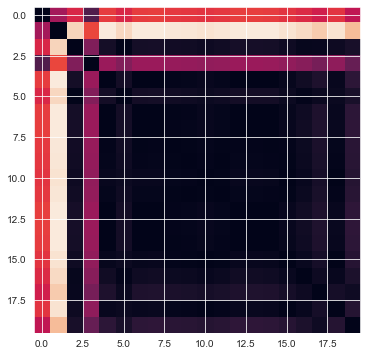

In [38]:
# Membuat similarity Matrix untuk Hierarchical

dist = cdist(agglo_clustered.iloc[:,0:2],agglo_clustered.iloc[:,0:2], metric='euclidean')
plt.figure(figsize = (10,6))
plt.imshow(dist)
plt.show()

In [39]:
# K-Means 
kmeans = KMeans(n_clusters=3).fit(X) 

# Hierarchical
hierar = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(X) 

# Menyimpan label

km_labels = davies_bouldin_score(X, kmeans.labels_)
hc_labels = davies_bouldin_score(X, hierar.labels_)

print(f'K-MEANS Davies Bouldin Score : {km_labels}') 
print(f'HIERARCHICAL Davies Bouldin Score : {hc_labels}') 

K-MEANS Davies Bouldin Score : 0.26033204614213545
HIERARCHICAL Davies Bouldin Score : 0.4033364447327529


> Indeks validitas Davies-Bouldin (DB) menghitung rata-rata nilai setiap titik pada himpunan data. Perhitungan nilai setiap titik adalah jumlah nilai compactness yang dibagi dengan jarak antara kedua titik pusat klaster sebagai separation. Jumlah cluster terbaik ditunjukkan dengan nilai DB yang semakin kecil, sehingga dalam hal ini metode **K-Means Clustering** lebih baik jika di bandingkan dengan metode **Hierarchical / Agglomerative Clustering**.